Optimal solution: x = -0.3078606510906785, Optimal value: f(x) = -3.902340066018879


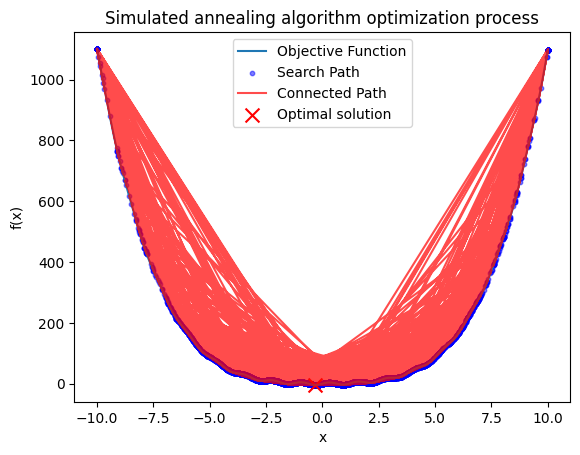

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 定义目标函数
def objective_function(x):
    return x**2 + 4 * np.sin(5 * x) + 0.1 * x**4

# 模拟退火算法实现
def simulated_annealing(objective, bounds, initial_temp, final_temp, alpha, max_iter):
    current_solution = np.random.uniform(bounds[0], bounds[1])
    current_value = objective(current_solution)
    best_solution = current_solution
    best_value = current_value
    temperature = initial_temp

    solutions = [current_solution]  # 记录解的变化

    while temperature > final_temp:
        for _ in range(max_iter):
            # 生成新解（在邻域内随机扰动）
            new_solution = current_solution + np.random.uniform(-10, 10)
            
            # 边界检查
            new_solution = np.clip(new_solution, bounds[0], bounds[1]) #将置于bounds[0], bounds[1]边界之外的值clip到最近的对应边界
            new_value = objective(new_solution)

            # 计算目标函数差值
            delta_E = new_value - current_value

            # 判断是否接受新解
            if delta_E < 0 or np.random.rand() < np.exp(-delta_E / temperature):
                current_solution = new_solution
                current_value = new_value

                # 更新最优解
                if current_value < best_value:
                    best_solution = current_solution
                    best_value = current_value

            solutions.append(current_solution)

        # 降温
        temperature *= alpha

    return best_solution, best_value, solutions

# 参数设置
bounds = [-10, 10]
initial_temp = 1000
final_temp = 1e-5
alpha = 0.9  # 降温速率
max_iter = 100  # 每个温度下的迭代次数

# 运行模拟退火算法
best_solution, best_value, solutions = simulated_annealing(objective_function, bounds, initial_temp, final_temp, alpha, max_iter)

print(f"Optimal solution: x = {best_solution}, Optimal value: f(x) = {best_value}")


# 可视化
x_vals = np.linspace(bounds[0], bounds[1], 400)
y_vals = objective_function(x_vals)

plt.plot(x_vals, y_vals, label='Objective Function')
plt.scatter(solutions, [objective_function(x) for x in solutions], color='blue', s=10, alpha=0.5, label='Search Path')

plt.plot(solutions, [objective_function(x) for x in solutions], color='red', alpha=0.7, label='Connected Path')

plt.scatter(best_solution, best_value, color='red', label='Optimal solution', marker='x', s=100)
plt.title('Simulated annealing algorithm optimization process')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()